In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/EV_Energy_Consumption_Dataset.csv')

In [3]:
df.columns

Index(['Vehicle_ID', 'Timestamp', 'Speed_kmh', 'Acceleration_ms2',
       'Battery_State_%', 'Battery_Voltage_V', 'Battery_Temperature_C',
       'Driving_Mode', 'Road_Type', 'Traffic_Condition', 'Slope_%',
       'Weather_Condition', 'Temperature_C', 'Humidity_%', 'Wind_Speed_ms',
       'Tire_Pressure_psi', 'Vehicle_Weight_kg', 'Distance_Travelled_km',
       'Energy_Consumption_kWh'],
      dtype='object')

In [5]:
df.duplicated().sum()

0

In [6]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')

In [7]:
df.describe()

,Vehicle_ID,Timestamp,Speed_kmh,Acceleration_ms2,Battery_State_%,Battery_Voltage_V,Battery_Temperature_C,Driving_Mode,Road_Type,Traffic_Condition,Slope_%,Weather_Condition,Temperature_C,Humidity_%,Wind_Speed_ms,Tire_Pressure_psi,Vehicle_Weight_kg,Distance_Travelled_km,Energy_Consumption_kWh
count,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1505.701200,2024-01-02 17:39:30,59.312952,-0.019885,60.214465,351.118306,27.510130,2.011000,1.999200,2.010800,2.504690,2.48340,17.312654,55.302173,7.505087,31.503390,1854.719760,24.994042,8.437983
min,1000.000000,2024-01-01 00:00:00,0.001396,-2.999683,20.020196,300.004812,10.003858,1.000000,1.000000,1.000000,-4.991079,1.00000,-4.995288,20.027119,0.000126,28.001891,1200.960317,0.107544,1.881426
25%,1253.000000,2024-01-01 20:49:45,29.515400,-1.490240,40.088318,326.613439,18.884742,1.000000,1.000000,1.000000,-1.235653,1.00000,5.950476,37.970900,3.837738,29.772709,1531.417633,12.736568,6.771081
50%,1510.000000,2024-01-02 17:39:30,58.646794,-0.043329,60.490283,351.510915,27.581710,2.000000,2.000000,2.000000,2.452368,2.00000,17.330798,55.650512,7.495373,31.484048,1865.006523,24.640458,8.455746
75%,1761.000000,2024-01-03 14:29:15,89.030001,1.473887,80.409928,375.968140,35.920162,3.000000,3.000000,3.000000,6.366990,3.00000,28.624021,72.650838,11.291284,33.256528,2181.071491,37.562482,10.031938
max,1999.000000,2024-01-04 11:19:00,119.946924,2.998039,99.993986,399.990098,44.985943,3.000000,3.000000,3.000000,9.998358,4.00000,39.998063,89.988891,14.999095,34.997829,2499.504564,49.993767,14.660528
std,290.836902,NaN,34.517605,1.724287,23.128262,28.968372,10.015385,0.810068,0.808536,0.812167,4.360854,1.11372,13.005106,20.161289,4.325455,2.017357,373.685150,14.246454,2.184809


In [8]:
df = df.drop(columns=["Vehicle_ID"])

## Skewness Analysis and Transformations

Skewness was computed for all numerical variables to assess whether mathematical transformations were required.

All features exhibited skewness values close to zero, indicating approximately symmetric distributions. Since no variable showed significant skewness, applying transformations such as logarithmic or square-root scaling was deemed unnecessary.

Therefore, no mathematical transformations were applied, and the original feature values were retained for modeling.

In [9]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numerical_cols].skew()

Speed_kmh                 0.036210
Acceleration_ms2          0.015909
Battery_State_%          -0.016443
Battery_Voltage_V        -0.051650
Battery_Temperature_C    -0.001318
Driving_Mode             -0.020050
Road_Type                 0.001455
Traffic_Condition        -0.019740
Slope_%                   0.001845
Weather_Condition         0.022608
Temperature_C             0.005821
Humidity_%               -0.033031
Wind_Speed_ms            -0.004538
Tire_Pressure_psi        -0.002460
Vehicle_Weight_kg        -0.041860
Distance_Travelled_km     0.019751
Energy_Consumption_kWh    0.020562
dtype: float64

<Axes: >

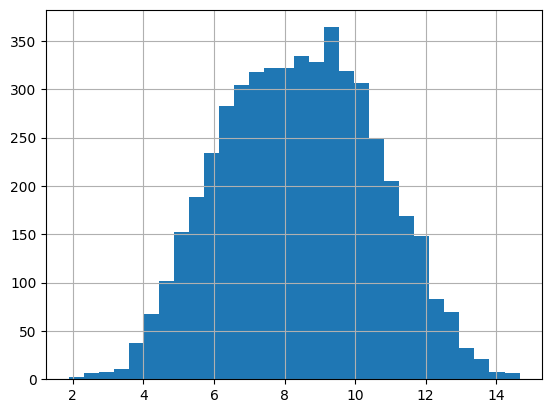

In [10]:
df["Energy_Consumption_kWh"].hist(bins=30)

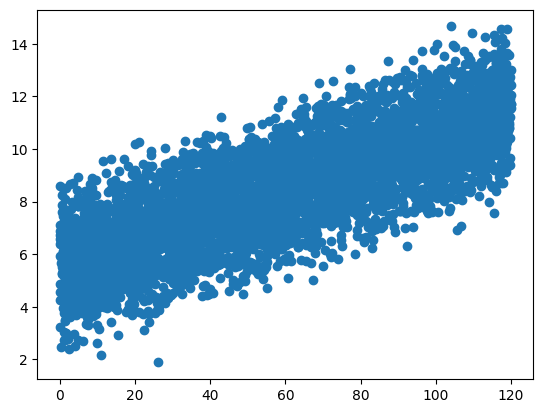

In [11]:
plt.scatter(df["Speed_kmh"], df["Energy_Consumption_kWh"])

In [12]:
df[["Driving_Mode", "Road_Type", "Traffic_Condition", "Weather_Condition"]].nunique()

Driving_Mode         3
Road_Type            3
Traffic_Condition    3
Weather_Condition    4
dtype: int64

## Feature Scaling (Standardization)

Continuous numerical features were standardized using **z-score scaling** to ensure comparable feature scales and improve numerical stability for linear regression.

The following variables were scaled:

- Speed_kmh  
- Acceleration_ms2  
- Battery_State_%  
- Battery_Voltage_V  
- Battery_Temperature_C  
- Slope_%  
- Temperature_C  
- Humidity_%  
- Wind_Speed_ms  
- Tire_Pressure_psi  
- Vehicle_Weight_kg  
- Distance_Travelled_km  

Standardization was performed using `StandardScaler`, which transforms each feature according to:

$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$

After scaling:
- The mean of each scaled feature is approximately **0**
- The standard deviation of each scaled feature is approximately **1**

This confirms that feature scaling was applied correctly while leaving categorical variables and the target variable unchanged.

In [13]:
from sklearn.preprocessing import StandardScaler

scale_cols = ["Speed_kmh", 
              "Acceleration_ms2", 
              "Battery_State_%",
              "Battery_Voltage_V",
              "Battery_Temperature_C",
              "Slope_%",
              "Temperature_C",
              "Humidity_%",
              "Wind_Speed_ms",
              "Tire_Pressure_psi",
              "Vehicle_Weight_kg",
              "Distance_Travelled_km"
]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[scale_cols] = scaler.fit_transform(df[scale_cols])
df_scaled.head()


,Timestamp,Speed_kmh,Acceleration_ms2,Battery_State_%,Battery_Voltage_V,Battery_Temperature_C,Driving_Mode,Road_Type,Traffic_Condition,Slope_%,Weather_Condition,Temperature_C,Humidity_%,Wind_Speed_ms,Tire_Pressure_psi,Vehicle_Weight_kg,Distance_Travelled_km,Energy_Consumption_kWh
0,2024-01-01 00:00:00,1.512261,-1.597302,-1.288566,0.931220,-0.219219,2,1,1,1.003288,4,-1.274310,-0.651295,0.074951,-0.194021,-0.084979,-0.297404,12.054317
1,2024-01-01 00:01:00,-0.310036,-0.450723,1.607332,1.436195,-0.925606,1,2,1,-1.264077,4,-1.600160,0.085135,-0.695838,0.000483,0.634587,-1.709447,4.488701
2,2024-01-01 00:02:00,1.431887,0.158739,1.067984,1.652836,1.691468,1,1,3,-0.567630,1,-0.620155,0.680914,-0.545800,1.157385,-0.101746,1.112583,11.701377
3,2024-01-01 00:03:00,-0.600724,-1.213092,-1.359363,0.242011,0.146791,1,2,2,1.322638,3,-1.110771,1.554430,-0.690587,0.868859,-1.529829,-1.382153,7.389266
4,2024-01-01 00:04:00,-0.062018,0.868717,-1.317754,-1.388900,0.566627,2,1,1,0.062408,2,-0.043250,-1.394544,-0.749518,1.029315,0.817966,-1.345600,6.761205


In [14]:
df_scaled[scale_cols].mean()

Speed_kmh                2.582823e-16
Acceleration_ms2         0.000000e+00
Battery_State_%         -6.110668e-17
Battery_Voltage_V       -2.134470e-15
Battery_Temperature_C    3.595346e-16
Slope_%                 -5.400125e-17
Temperature_C           -2.913225e-17
Humidity_%              -1.094236e-16
Wind_Speed_ms           -1.115552e-16
Tire_Pressure_psi       -9.244161e-16
Vehicle_Weight_kg       -6.139089e-16
Distance_Travelled_km   -1.421085e-18
dtype: float64

In [15]:
df_scaled[scale_cols].std()

Speed_kmh                1.0001
Acceleration_ms2         1.0001
Battery_State_%          1.0001
Battery_Voltage_V        1.0001
Battery_Temperature_C    1.0001
Slope_%                  1.0001
Temperature_C            1.0001
Humidity_%               1.0001
Wind_Speed_ms            1.0001
Tire_Pressure_psi        1.0001
Vehicle_Weight_kg        1.0001
Distance_Travelled_km    1.0001
dtype: float64

In [16]:
df_scaled.head()

,Timestamp,Speed_kmh,Acceleration_ms2,Battery_State_%,Battery_Voltage_V,Battery_Temperature_C,Driving_Mode,Road_Type,Traffic_Condition,Slope_%,Weather_Condition,Temperature_C,Humidity_%,Wind_Speed_ms,Tire_Pressure_psi,Vehicle_Weight_kg,Distance_Travelled_km,Energy_Consumption_kWh
0,2024-01-01 00:00:00,1.512261,-1.597302,-1.288566,0.931220,-0.219219,2,1,1,1.003288,4,-1.274310,-0.651295,0.074951,-0.194021,-0.084979,-0.297404,12.054317
1,2024-01-01 00:01:00,-0.310036,-0.450723,1.607332,1.436195,-0.925606,1,2,1,-1.264077,4,-1.600160,0.085135,-0.695838,0.000483,0.634587,-1.709447,4.488701
2,2024-01-01 00:02:00,1.431887,0.158739,1.067984,1.652836,1.691468,1,1,3,-0.567630,1,-0.620155,0.680914,-0.545800,1.157385,-0.101746,1.112583,11.701377
3,2024-01-01 00:03:00,-0.600724,-1.213092,-1.359363,0.242011,0.146791,1,2,2,1.322638,3,-1.110771,1.554430,-0.690587,0.868859,-1.529829,-1.382153,7.389266
4,2024-01-01 00:04:00,-0.062018,0.868717,-1.317754,-1.388900,0.566627,2,1,1,0.062408,2,-0.043250,-1.394544,-0.749518,1.029315,0.817966,-1.345600,6.761205


In [15]:
df_scaled.to_csv('../data/processed/EV_Energy_Consumption_Dataset_Processed.csv', index=False)

In [18]:
df_time = df_scaled.copy()
df_time = df_time.sort_values(by="Timestamp").reset_index(drop=True)

In [19]:
df_time["hour"] = df_time["Timestamp"].dt.hour
df_time["dayofweek"] = df_time["Timestamp"].dt.dayofweek
df_time["is_peak"] = (
    df_time["hour"].between(7, 9) | df_time["hour"].between(16, 19)
).astype(int)

In [20]:
df_time["energy_lag_1"] = df_time["Energy_Consumption_kWh"].shift(1)
df_time["energy_roll_mean_3"] = (
    df_time["Energy_Consumption_kWh"].shift(1).rolling(3).mean()
)

In [21]:
df_time = df_time.dropna().reset_index(drop=True)

In [22]:
df_time.columns

Index(['Timestamp', 'Speed_kmh', 'Acceleration_ms2', 'Battery_State_%',
       'Battery_Voltage_V', 'Battery_Temperature_C', 'Driving_Mode',
       'Road_Type', 'Traffic_Condition', 'Slope_%', 'Weather_Condition',
       'Temperature_C', 'Humidity_%', 'Wind_Speed_ms', 'Tire_Pressure_psi',
       'Vehicle_Weight_kg', 'Distance_Travelled_km', 'Energy_Consumption_kWh',
       'hour', 'dayofweek', 'is_peak', 'energy_lag_1', 'energy_roll_mean_3'],
      dtype='object')

In [23]:
df_time.shape

(4997, 23)

In [25]:
df_time.to_csv('../data/processed/EV_Energy_Consumption_Dataset_Featured.csv', index=False)